<div style="text-align:right;">Coursera - Data Science Methodology Final Assignment </div>
<div style="text-align:right;">Brickea Wang</div>

# Topic: Hospital - Breast Cancer Prediction

## First - Describe the problem, related to the topic.

As we all know, cancer cells have very clear differences between normal cells. So can we use some ways to get the images or data from cells. And by analysising the data to judge if a patient has breast cancer.

![](https://www.cancer.gov/sites/g/files/xnrzdm211/files/styles/cgov_article/public/cgov_contextual_image/900/300/files/hyperplasia-dysplasia-cancer-progression-article.jpg?h=a6a6ac86&itok=PouWV9fw)

## Second - Phrase the problem as a question to be answered using data.

The data is collected by using FNA and dataset is from University of Wisconsin which has 569 instances (rows — samples) and 32 attributes (features — columns). And it's also a data source from UCI website([click here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29))

Phrase the problem as a question is: **Can we use cell features data to determine if a cell is cancer cell?**

![](https://miro.medium.com/max/2532/0*b9_zCgSp810n7oUj)

> Moreover, FNA is a type of biopsy procedure where a very thin needle is inserted into an area of abnormal tissue or cells with a guide of CT scan or ultrasound monitors (figure1). The collected sample is then transferred to a pathologist to study it under a microscope and examine whether cells in the biopsy are normal or not.

In [77]:
# import breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
# change the dataset into pandas dataframe and series
import pandas as pd
cancer_features = pd.DataFrame(cancer_data.data,columns = cancer_data.feature_names)
cancer_result = pd.Series(cancer_data.target)
cancer_features.shape

(569, 30)

In [14]:
# a glisp of breast cancer features
cancer_features.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [44]:
# a glisp of breast cancer result which is what we want to predict
cancer_result.head(10)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Length: 100, dtype: int64

0.6274165202108963

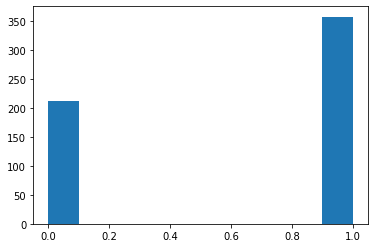

In [71]:
# calculate the cancer rate of data set
from matplotlib import pyplot as plt
import numpy as np
plt.hist(cancer_result)
sum(cancer_result)/len(cancer_result)

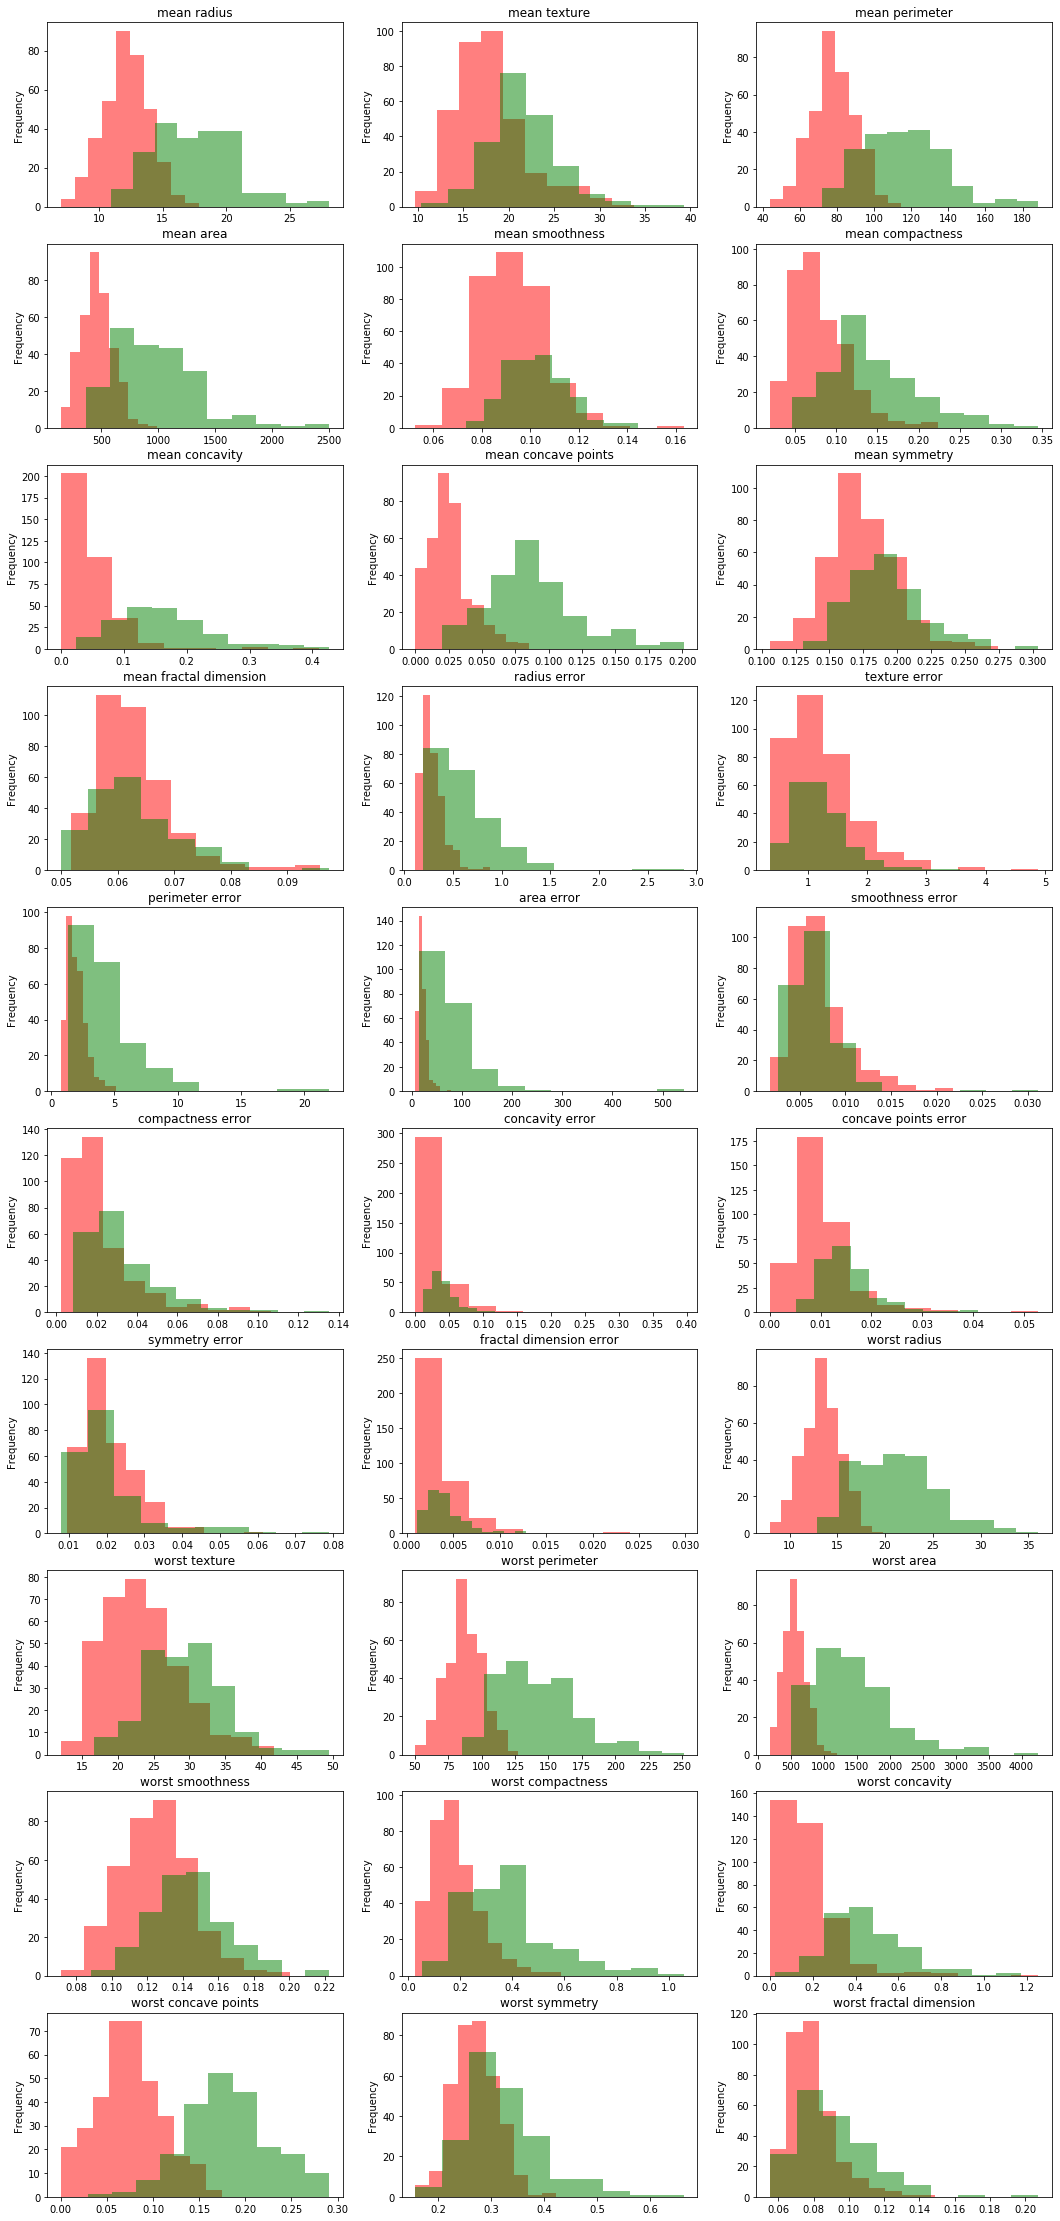

In [99]:
# plot pair plot to see if there is pattern of cancer cell
# and the features that clearly divide cells can be Data Requirement
cancer_feature_result = cancer_features
cancer_feature_result['is_cancer'] = cancer_result
index = 1
plt.figure(figsize=[18,40])
for i in cancer_data.feature_names:
    plt.subplot(10,3,index)
    cancer_feature_result[i][cancer_feature_result['is_cancer']==1].plot.hist(alpha=0.5,color='red',title=i)
    cancer_feature_result[i][cancer_feature_result['is_cancer']==0].plot.hist(alpha=0.5,color='green')
    index = index+1
plt.show()



As image shown above, we can directly see that there are some cell features can divide health cell and cancer cell.
The features like mean radius, mean perimeter, worst concave points, mean concavity can directly divide cell into two groups. So I think they can be required as a requirements in the following stages.
So phrase the problem as a question is: **Can we use cell features to determine if a cell is cancer cell?**

## References

[("What Is Cancer?", 2020)](https://www.cancer.gov/about-cancer/understanding/what-is-cancer)  
[("Breast Cancer Cell Type Classifier", 2020)](https://www.cancer.gov/about-cancer/understanding/what-is-cancer)